<a href="https://colab.research.google.com/github/MoFahad2921/FYP/blob/main/Capstone2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#This is the beginning of my final year project model


#Steps in the making:

#"What is the signaficance of my model"

'''
Step1: Get dataset = done
Step2: Load dataset into colab and preprocess = Done
Step3: Descriptive analysis = Done
Step4: Establish column roles and assign target variable = Done
Step5: Begin Predictive analysis (TTT) = Done

Now that I have the rough version of the code. I want to firstly polish it and then use 3 or 4 different prediction models to compare.
Linear regression, random forest, decision tree, Gradient Boost, Neural Network and finally the association rule mining.

Finally explain in detail in the Report

'''

'\nStep1: Get dataset = done\nStep2: Load dataset into colab and preprocess = Done\nStep3: Descriptive analysis = In process\nStep4: Establish column roles and assign target variable = Done\nStep5: Begin Predictive analysis (TTT) = Done\n\nNow that I have the rough version of the code. I want to firstly polish it and then use 3 or 4 different prediction models to compare.\nLinear regression, random forest, decision tree, Gradient Boost, Neural Network and finally the bread+tea+jam thing that mr murtaza taught us in power bi class.\n\n'

In [4]:
#https://docs.google.com/spreadsheets/d/1aN-anakV_iQwNgxQVkSRA7AeGCE6rLKL/edit?gid=206756247#gid=206756247
#SHEET_ID = '1aN-anakV_iQwNgxQVkSRA7AeGCE6rLKL'
#SHEET_NAME = '206756247'

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

print("Google Drive mounted successfully at /content/drive")

Mounted at /content/drive
Google Drive mounted successfully at /content/drive


In [5]:
import pandas as pd
import numpy as np

# Load dataset from Google Drive
df = pd.read_excel('/content/drive/My Drive/Colab Notebooks/flight_ops_dataset_upgraded.xlsx', engine='openpyxl')
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,aircraft_age_years,thrust_setting_pct,flight_distance_nm,wind_component_knots,cruise_altitude_ft,taxi_time_min,holding_time_min,engine_type,flap_setting,apu_usage_min
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,17,99.4,7987.9,16.0,39000,21,10,CFM56,Flaps 10,17
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,20,89.3,6310.0,31.7,41000,20,22,GE90,Flaps 15,10
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,12,91.6,2347.2,31.1,33000,28,6,GE90,Flaps 15,17
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,11,87.8,4476.6,-0.3,37000,15,1,GE90,Flaps 10,25
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,17,98.1,3944.7,-38.7,41000,31,20,Trent 700,Flaps 5,6


In [6]:
# Create estimated fuel burn target variable
df["estimated_fuel_burn_kg"] = (
    (df["flight_distance_nm"] * 0.08)
    + (df["taxi_time_min"] * 5)
    + (df["holding_time_min"] * 7)
    + (df["payload_weight_kg"] * 0.01)
    - (df["wind_component_knots"] * 0.3)
    - (df["cruise_altitude_ft"] * 0.0001)
    + (df["apu_usage_min"] * 2)
)
print("Target variable 'estimated_fuel_burn_kg' created.")

Target variable 'estimated_fuel_burn_kg' created.


In [7]:
# Simulate real fuel burn with ±6% noise
np.random.seed(42)
noise = np.random.normal(0, 0.06 * df["estimated_fuel_burn_kg"])
df["real_fuel_burn_kg"] = df["estimated_fuel_burn_kg"] + noise

df[["estimated_fuel_burn_kg", "real_fuel_burn_kg"]].head()

,estimated_fuel_burn_kg,real_fuel_burn_kg
0,1018.062,1048.403148
1,1023.850,1015.356286
2,603.956,627.426523
3,618.858,675.410353
4,782.276,771.285646


In [8]:
feature_cols = [
    "flight_distance_nm",
    "taxi_time_min",
    "holding_time_min",
    "payload_weight_kg",
    "wind_component_knots",
    "cruise_altitude_ft",
    "apu_usage_min"
]
X = df[feature_cols]
y = df["real_fuel_burn_kg"]

In [9]:
# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Model Training & Evaluation Function
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(model, X_train, X_test, y_train, y_test, model_name="Model"):
    """Train, predict, and evaluate a regression model."""
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"{model_name} Performance:")
    print(f"MAE  : {mae:.2f}")
    print(f"RMSE : {rmse:.2f}")
    print(f"R²   : {r2:.4f}\n")

    return y_pred, mae, rmse, r2

In [11]:
# Linear Regression
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
y_pred_lr, mae_lr, rmse_lr, r2_lr = evaluate_model(lr_model, X_train, X_test, y_train, y_test, "Linear Regression")

Linear Regression Performance:
MAE  : 37.71
RMSE : 49.00
R²   : 0.9456



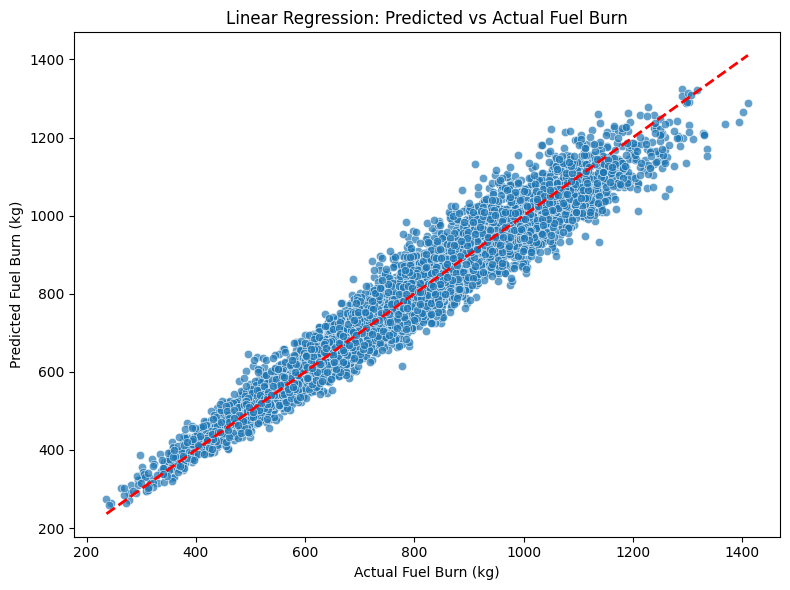

In [12]:
# Linear Regression Predictions vs Actual
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: Predicted vs Actual
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_lr, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.title("Linear Regression: Predicted vs Actual Fuel Burn")
plt.xlabel("Actual Fuel Burn (kg)")
plt.ylabel("Predicted Fuel Burn (kg)")
plt.tight_layout()
plt.show()

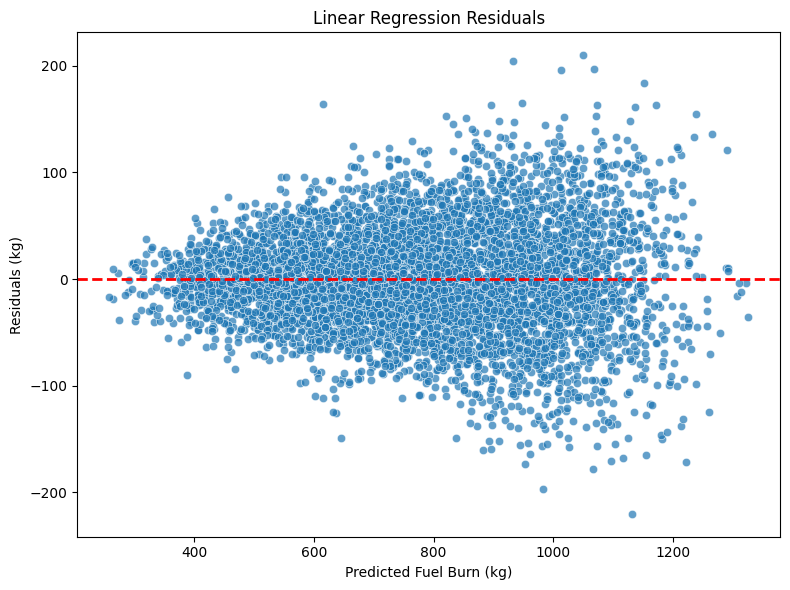

In [13]:
# Residual plot: Errors
residuals_lr = y_test - y_pred_lr
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred_lr, y=residuals_lr, alpha=0.7)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title("Linear Regression Residuals")
plt.xlabel("Predicted Fuel Burn (kg)")
plt.ylabel("Residuals (kg)")
plt.tight_layout()
plt.show()

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso

ridge_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("ridge", Ridge(alpha=1.0))
])
y_pred_ridge, mae_ridge, rmse_ridge, r2_ridge = evaluate_model(ridge_pipeline, X_train, X_test, y_train, y_test, "Ridge Regression")

lasso_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("lasso", Lasso(alpha=0.01))
])
y_pred_lasso, mae_lasso, rmse_lasso, r2_lasso = evaluate_model(lasso_pipeline, X_train, X_test, y_train, y_test, "Lasso Regression")

Ridge Regression Performance:
MAE  : 37.71
RMSE : 49.00
R²   : 0.9456

Lasso Regression Performance:
MAE  : 37.71
RMSE : 49.00
R²   : 0.9456



In [15]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
y_pred_rf, mae_rf, rmse_rf, r2_rf = evaluate_model(rf_model, X_train, X_test, y_train, y_test, "Random Forest")

Random Forest Performance:
MAE  : 41.32
RMSE : 53.26
R²   : 0.9357



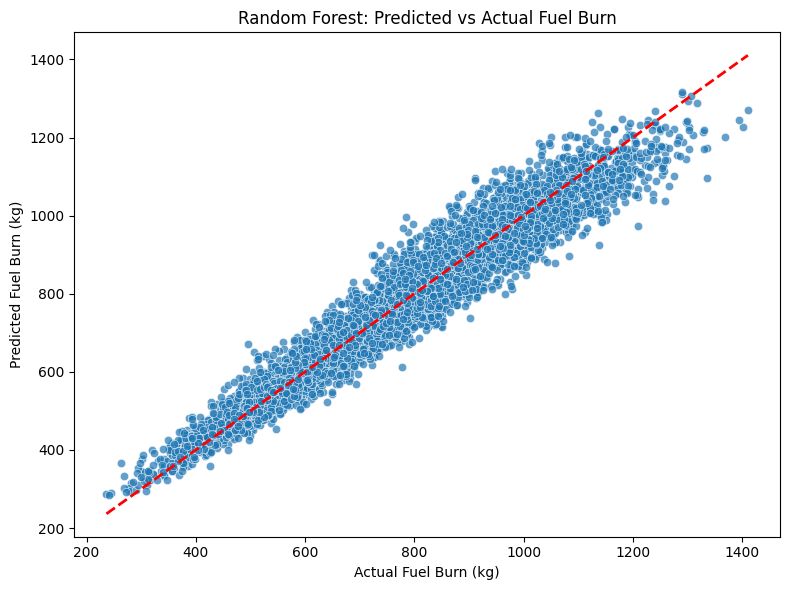

In [16]:
# Random Forest Predictions vs Actual
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: Predicted vs Actual
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.title("Random Forest: Predicted vs Actual Fuel Burn")
plt.xlabel("Actual Fuel Burn (kg)")
plt.ylabel("Predicted Fuel Burn (kg)")
plt.tight_layout()
plt.show()

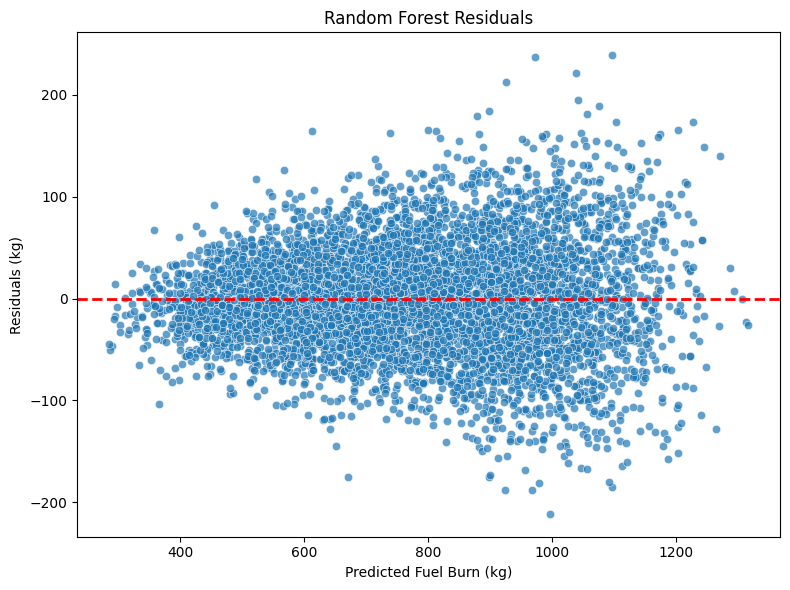

In [17]:
# Residual plot: Errors
residuals_rf = y_test - y_pred_rf
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred_rf, y=residuals_rf, alpha=0.7)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title("Random Forest Residuals")
plt.xlabel("Predicted Fuel Burn (kg)")
plt.ylabel("Residuals (kg)")
plt.tight_layout()
plt.show()

In [18]:
# XGBoost Regressor
from xgboost import XGBRegressor

xgb_model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
y_pred_xgb, mae_xgb, rmse_xgb, r2_xgb = evaluate_model(xgb_model, X_train, X_test, y_train, y_test, "XGBoost")

XGBoost Performance:
MAE  : 38.37
RMSE : 49.78
R²   : 0.9438



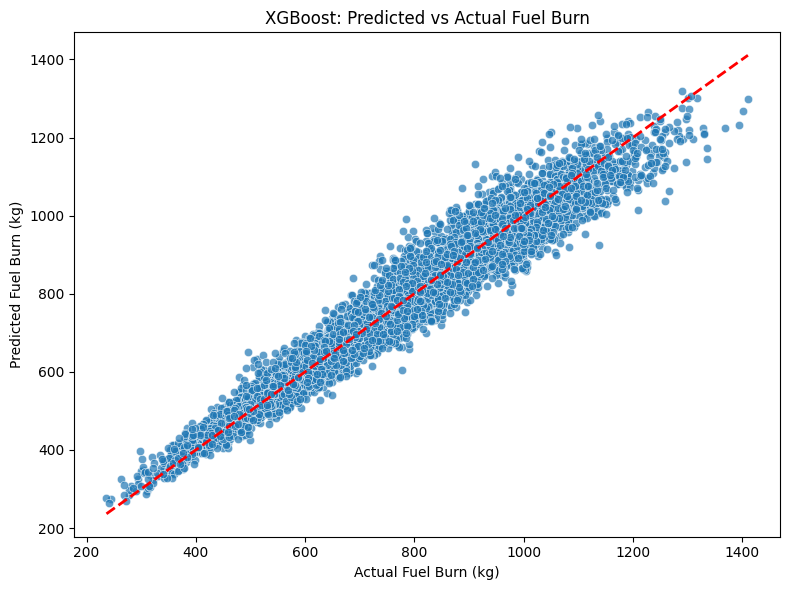

In [19]:
# XGBoost Predictions vs Actual
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: Predicted vs Actual
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_xgb, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.title("XGBoost: Predicted vs Actual Fuel Burn")
plt.xlabel("Actual Fuel Burn (kg)")
plt.ylabel("Predicted Fuel Burn (kg)")
plt.tight_layout()
plt.show()

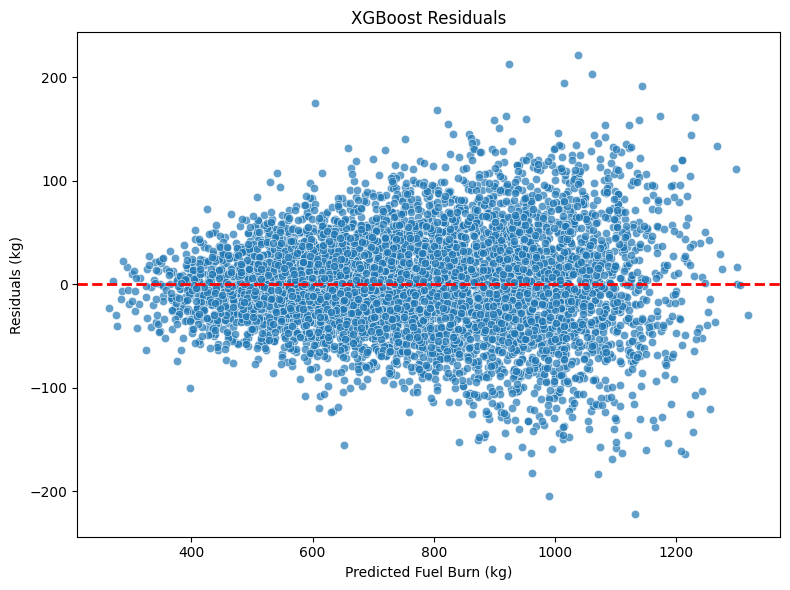

In [20]:
# Residual plot: Errors
residuals_xgb = y_test - y_pred_xgb
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred_xgb, y=residuals_xgb, alpha=0.7)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title("XGBoost Residuals")
plt.xlabel("Predicted Fuel Burn (kg)")
plt.ylabel("Residuals (kg)")
plt.tight_layout()
plt.show()

In [21]:
# Compare Model Performance
results = pd.DataFrame({
    "Model": ["Linear Regression", "Ridge Regression", "Lasso Regression", "Random Forest", "XGBoost"],
    "MAE": [mae_lr, mae_ridge, mae_lasso, mae_rf, mae_xgb],
    "RMSE": [rmse_lr, rmse_ridge, rmse_lasso, rmse_rf, rmse_xgb],
    "R2": [r2_lr, r2_ridge, r2_lasso, r2_rf, r2_xgb]
})
results

,Model,MAE,RMSE,R2
0,Linear Regression,37.710632,48.995174,0.945562
1,Ridge Regression,37.710804,48.995243,0.945562
2,Lasso Regression,37.711094,48.995511,0.945562
3,Random Forest,41.322212,53.261958,0.935668
4,XGBoost,38.372044,49.784212,0.943795


/tmp/ipython-input-468963162.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R2', data=results_sorted_r2, palette='viridis')


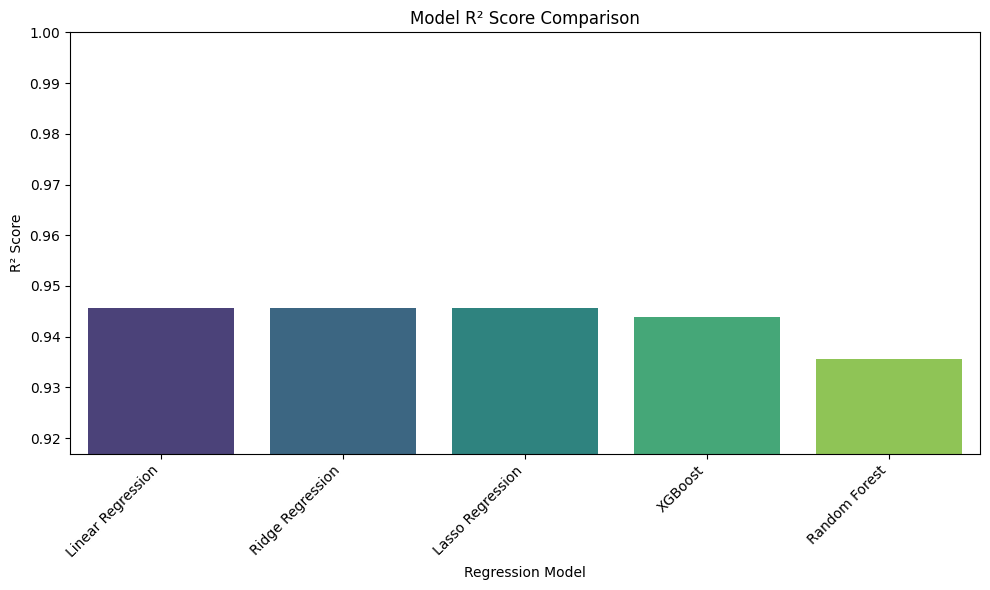

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort results by R2 score for better visualization
results_sorted_r2 = results.sort_values(by='R2', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='R2', data=results_sorted_r2, palette='viridis')
plt.title('Model R² Score Comparison')
plt.xlabel('Regression Model')
plt.ylabel('R² Score')
plt.ylim(results_sorted_r2['R2'].min() * 0.98, 1.0) # Adjust y-axis to show differences more clearly
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

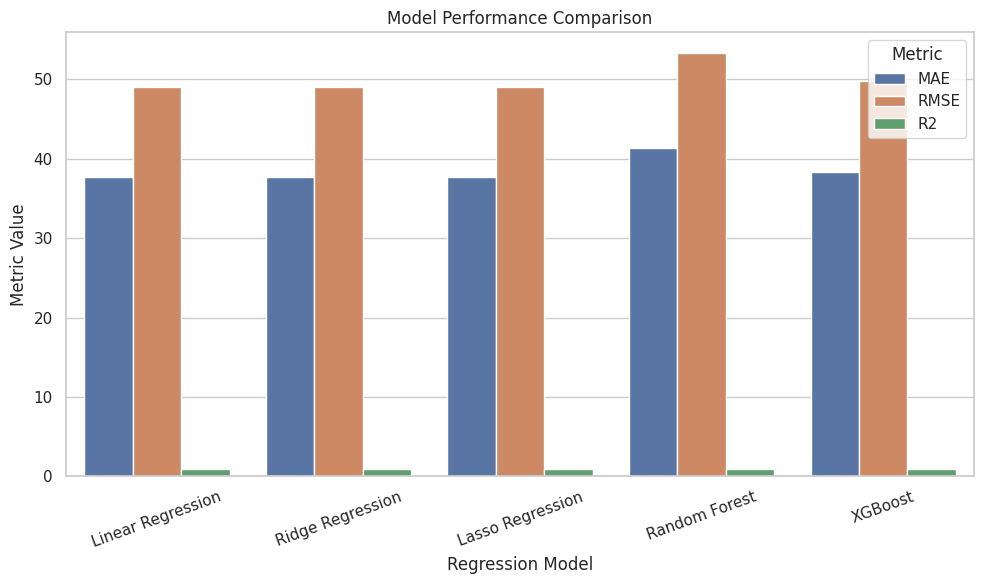

In [23]:
# Visualize Model Performance Comparison
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Melt the results dataframe for easier plotting
results_melted = results.melt(id_vars="Model", var_name="Metric", value_name="Value")

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x="Model", y="Value", hue="Metric", data=results_melted)
plt.title("Model Performance Comparison")
plt.ylabel("Metric Value")
plt.xlabel("Regression Model")
plt.xticks(rotation=20)
plt.legend(title="Metric")
plt.tight_layout()
plt.show()

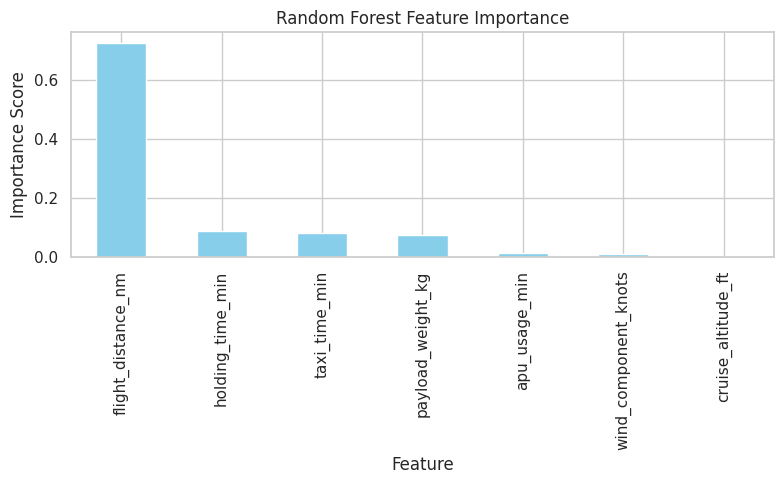

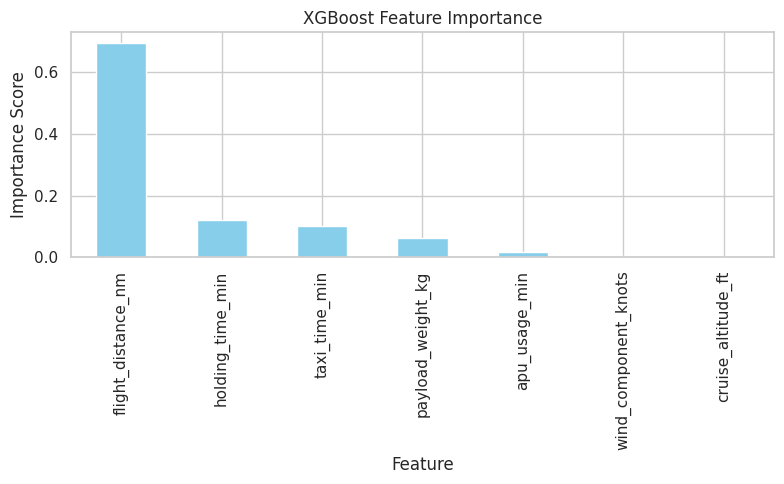

In [24]:
# Feature Importance Visualizations
import matplotlib.pyplot as plt

def plot_feature_importance(model, features, model_name="Model"):
    """Plot feature importance for tree-based models."""
    importance = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
    plt.figure(figsize=(8,5))
    importance.plot(kind="bar", color='skyblue')
    plt.title(f"{model_name} Feature Importance")
    plt.ylabel("Importance Score")
    plt.xlabel("Feature")
    plt.tight_layout()
    plt.show()

plot_feature_importance(rf_model, feature_cols, "Random Forest")
plot_feature_importance(xgb_model, feature_cols, "XGBoost")

In [25]:
from sklearn.preprocessing import StandardScaler

# Select features for clustering
cluster_features = [
    "flight_distance_nm",
    "taxi_time_min",
    "holding_time_min",
    "payload_weight_kg",
    "wind_component_knots",
    "cruise_altitude_ft",
    "apu_usage_min"
]

X_cluster = df[cluster_features]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

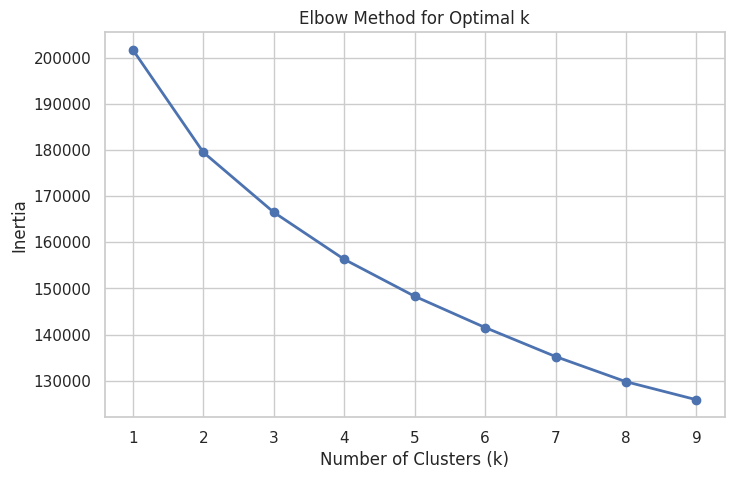

In [26]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-', linewidth=2)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

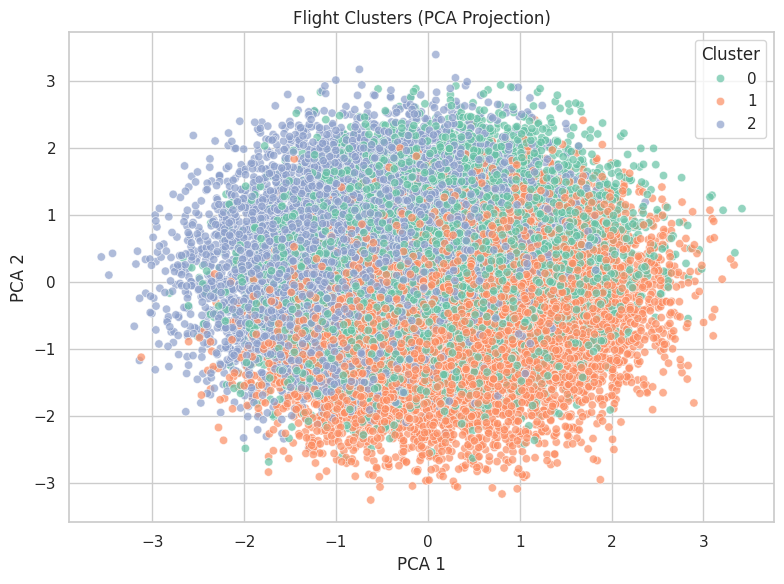

In [27]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_scaled)

from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df['pca1'] = X_pca[:,0]
df['pca2'] = X_pca[:,1]

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='cluster', palette='Set2', alpha=0.7)
plt.title("Flight Clusters (PCA Projection)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

In [32]:
rule_df = df[[
    "aircraft_age_years",
    "cruise_altitude_ft",
    "taxi_time_min",
    "real_fuel_burn_kg"
]].copy()

rule_df["AircraftAge"] = pd.qcut(
    rule_df["aircraft_age_years"], 3,
    labels=["YoungAircraft", "MidAgeAircraft", "OldAircraft"]
)

rule_df["CruiseAlt"] = pd.qcut(
    rule_df["cruise_altitude_ft"], 3,
    labels=["LowCruiseAlt", "MidCruiseAlt", "HighCruiseAlt"]
)

rule_df["TaxiTime"] = pd.qcut(
    rule_df["taxi_time_min"], 3,
    labels=["ShortTaxi", "MediumTaxi", "LongTaxi"]
)

rule_df["FuelBurn"] = pd.qcut(
    rule_df["real_fuel_burn_kg"], 3,
    labels=["LowFuel", "MediumFuel", "HighFuel"]
)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [41]:
import pandas as pd


print(rule_df.head())

#  distribution of FuelBurn across AircraftAge
print("\nFuelBurn vs AircraftAge:")
print(pd.crosstab(rule_df["AircraftAge"], rule_df["FuelBurn"]))

# FuelBurn vs CruiseAlt
print("\nFuelBurn vs CruiseAlt:")
print(pd.crosstab(rule_df["CruiseAlt"], rule_df["FuelBurn"]))

# FuelBurn vs TaxiTime
print("\nFuelBurn vs TaxiTime:")
print(pd.crosstab(rule_df["TaxiTime"], rule_df["FuelBurn"]))


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

   aircraft_age_years  cruise_altitude_ft  taxi_time_min  real_fuel_burn_kg  \
0                  17               39000             21        1048.403148   
1                  20               41000             20        1015.356286   
2                  12               33000             28         627.426523   
3                  11               37000             15         675.410353   
4                  17               41000             31         771.285646   

      AircraftAge      CruiseAlt    TaxiTime    FuelBurn  
0     OldAircraft   MidCruiseAlt  MediumTaxi    HighFuel  
1     OldAircraft  HighCruiseAlt  MediumTaxi    HighFuel  
2  MidAgeAircraft   LowCruiseAlt  MediumTaxi     LowFuel  
3  MidAgeAircraft   MidCruiseAlt   ShortTaxi  MediumFuel  
4     OldAircraft  HighCruiseAlt  MediumTaxi  MediumFuel  

FuelBurn vs AircraftAge:
FuelBurn        LowFuel  MediumFuel  HighFuel
AircraftAge                                  
YoungAircraft      3643        3569      3574
MidAgeA

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

FuelBurn       LowFuel  MediumFuel  HighFuel
CruiseAlt                                   
LowCruiseAlt      4721        4780      4794
MidCruiseAlt      3304        3248      3202
HighCruiseAlt     1582        1578      1611

FuelBurn vs TaxiTime:
FuelBurn    LowFuel  MediumFuel  HighFuel
TaxiTime                                 
ShortTaxi      4367        3291      2363
MediumTaxi     3122        3282      3126
LongTaxi       2118        3033      4118


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

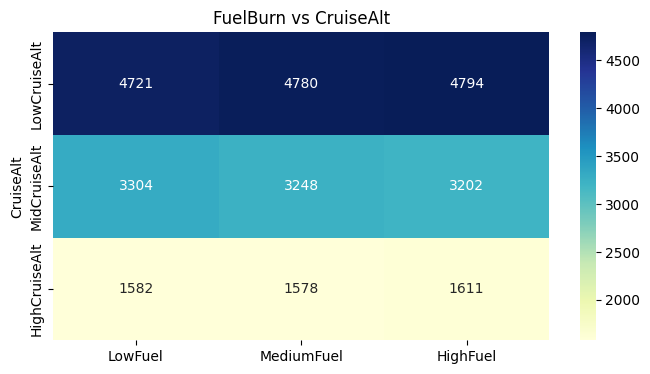

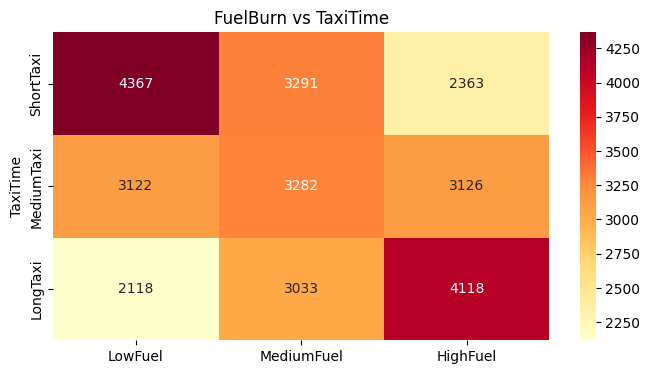

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data
fuel_vs_cruise = pd.DataFrame({
    "LowFuel": [4721, 3304, 1582],
    "MediumFuel": [4780, 3248, 1578],
    "HighFuel": [4794, 3202, 1611]
}, index=["LowCruiseAlt", "MidCruiseAlt", "HighCruiseAlt"])

fuel_vs_taxi = pd.DataFrame({
    "LowFuel": [4367, 3122, 2118],
    "MediumFuel": [3291, 3282, 3033],
    "HighFuel": [2363, 3126, 4118]
}, index=["ShortTaxi", "MediumTaxi", "LongTaxi"])

#  Heatmap for Cruise Altitude vs FuelBurn
plt.figure(figsize=(8, 4))
sns.heatmap(fuel_vs_cruise, annot=True, fmt="d", cmap="YlGnBu")
plt.title("FuelBurn vs CruiseAlt")
plt.ylabel("CruiseAlt")
plt.show()

# Heatmap for TaxiTime vs FuelBurn
plt.figure(figsize=(8, 4))
sns.heatmap(fuel_vs_taxi, annot=True, fmt="d", cmap="YlOrRd")
plt.title("FuelBurn vs TaxiTime")
plt.ylabel("TaxiTime")
plt.show()